In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from funcs import clean_column_names

In [16]:
gatec = pd.read_excel('../sample_data/gatec.xlsx')

In [17]:
gatec = gatec.convert_dtypes()
gatec.columns = clean_column_names(gatec.columns)

In [18]:
columns_to_select = [
    'cod_fazenda',
    'area_(ha)',
    'producao_(t)',
    'dist_(km)',
    'atr'
]

In [19]:
select_gatec = gatec[columns_to_select]

In [20]:
df_fazendas = select_gatec.groupby('cod_fazenda', as_index=False).agg({'area_(ha)': 'sum', 'producao_(t)': 'sum', 'dist_(km)': 'first', 'atr': 'first'})

In [21]:
df_fazendas['produtividade_(ton/ha)'] = df_fazendas.apply(lambda x: x['producao_(t)'] / x['area_(ha)'], axis=1)

In [22]:
df_fazendas.to_excel(f'../sample_data/fazendas.xlsx', index=False)

In [23]:
df_fazendas['latitude'] = np.random.randint(14, 22, size=len(df_fazendas)) + np.random.rand(len(df_fazendas))
df_fazendas['longitude'] = np.random.randint(42, 48, size=len(df_fazendas)) + np.random.rand(len(df_fazendas))

In [24]:
X_all = df_fazendas.drop('cod_fazenda', axis=1).values
X_atr = df_fazendas[['atr']].values
X_dist = df_fazendas[['dist_(km)']].values
X_atr_dist = df_fazendas[['atr', 'dist_(km)']].values
X_local = df_fazendas[['latitude', 'longitude']].values


In [25]:
model = KMeans(n_clusters=10)

df_fazendas['grupo_geral'] = model.fit_predict(X_all)
df_fazendas['grupo_atr'] = model.fit_predict(X_atr)
df_fazendas['grupo_dist'] = model.fit_predict(X_dist)
df_fazendas['grupo_atr_dist'] = model.fit_predict(X_atr_dist)
df_fazendas['grupo_local'] = model.fit_predict(X_local)

In [26]:
df_fazendas.head()

,cod_fazenda,area_(ha),producao_(t),dist_(km),atr,produtividade_(ton/ha),latitude,longitude,grupo_geral,grupo_atr,grupo_dist,grupo_atr_dist,grupo_local
0,7,10.42,907.582,8.0,150.773056,87.100000,18.192723,44.456166,8,6,4,0,5
1,8,10.05,777.87,6.0,151.808452,77.400000,14.914456,47.631859,8,2,4,0,9
2,9,79.14,4165.8,18.0,150.07958,52.638362,18.068845,47.263127,6,6,9,4,2
3,10,39.87,2699.199,6.0,146.631468,67.700000,19.668851,45.944512,5,0,4,0,2
4,11,48.46,4677.955,3.0,121.2522,96.532295,15.857028,42.305674,6,1,4,5,8


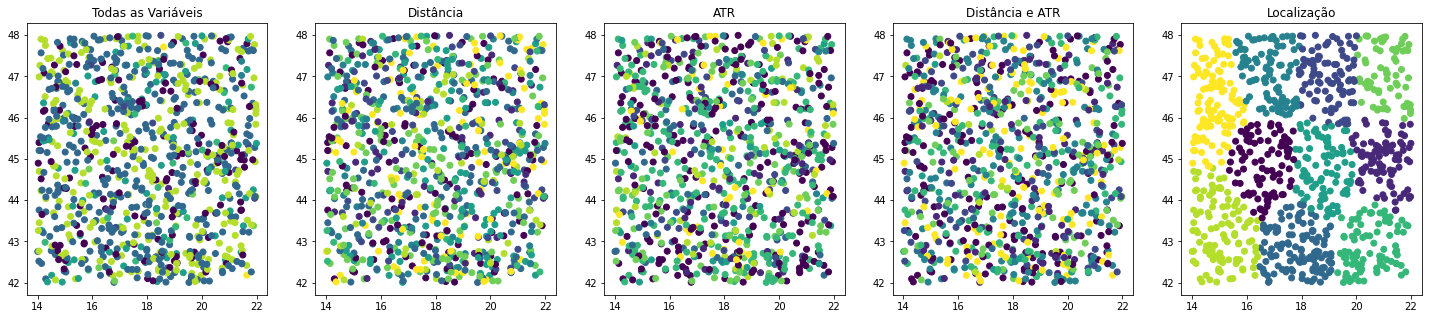

In [27]:
plt.figure(figsize=(25,5))

titulos = ['Todas as Variáveis', 'Distância', 'ATR', 'Distância e ATR', 'Localização']
colunas = ['grupo_geral', 'grupo_dist', 'grupo_atr', 'grupo_atr_dist', 'grupo_local']

for i, (titulo, coluna) in enumerate(zip(titulos, colunas)):
    plt.subplot(1, 5, i+1)
    plt.scatter(x=df_fazendas['latitude'], y=df_fazendas['longitude'], c=df_fazendas[coluna])
    plt.title(titulo)

plt.show()

In [28]:
df_fazendas.atr.describe()

count    930.000000
mean     146.029218
std        7.188554
min      119.788200
25%      145.562360
50%      147.098600
75%      150.479292
max      155.685172
Name: atr, dtype: float64

In [29]:
std = df_fazendas.atr.describe().loc['std']
media = df_fazendas.atr.mean()

variacao = std / media

print(f'{variacao:.2%}')

4.92%


In [30]:
df_fazendas.grupo_local.value_counts()

3    117
9    108
8    104
4     93
1     91
2     90
6     90
5     88
0     83
7     66
Name: grupo_local, dtype: int64

In [31]:
grupos = df_fazendas.grupo_local.drop_duplicates().values

In [32]:
df_dict = {}

for grupo in grupos:
    filtro = df_fazendas.grupo_local == grupo

    dataframe = df_fazendas.loc[filtro, ['cod_fazenda', 'latitude', 'longitude']]

    df_dict[grupo] = dataframe

oi
oi
oi
oi
oi


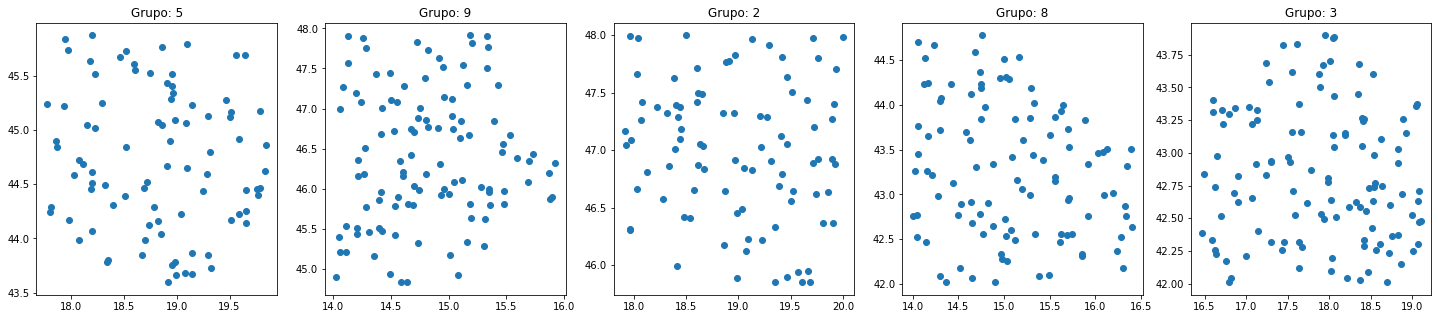

In [39]:
plt.figure(figsize=(25,5))

for i, (grupo, df) in enumerate(df_dict.items()):

    plt.subplot(1, 5, i+1)
    plt.scatter(x=df['latitude'], y=df['longitude'])
    plt.title(f'Grupo: {grupo}')

    if i == 4:
        break

plt.show()

In [48]:
for grupo, df in df_dict.items():
    df.to_excel(f'../inputs/df_{grupo}.xlsx', index=False)

In [ ]:
# df_fazendas['localizacao'] = df_fazendas.apply(lambda x: np.array([x['latitude'], x['longitude']]), axis=1)
# np.linalg.norm(df_fazendas.loc[0, 'localizacao'] - df_fazendas.loc[3, 'localizacao'])